# Predicting and Preventing Customer Churn: Modeling

*In this notebook I take an iterative approach to modeling. If you're reading this and are only really interested in the final model then skip down towards the bottom the the section labeled 'Final Model'

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.RandomState(seed=42)

RandomState(MT19937) at 0x12505C8D0

In [128]:
df= pd.read_csv('Telecom_Churn.csv', index_col= 0)
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0


### Before doing any modeling we want to look at our baseline churn rate. This will be relevant when looking at accurcy scores

In [129]:
total= len(df)
churn= df.Churn.value_counts()

print('{}% did not churn.'.format(round(churn[0]/total * 100)))
print('{}% churned. This is our annual churn rate which is very important!!'.format(round(churn[1]/total * 100)))

84% did not churn.
16% churned. This is our annual churn rate which is very important!!


### Splitting Data into Train and Test

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= df.drop(columns='Churn')
y= df['Churn'].values
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

## Logistic Regression Out of Box 

In [131]:
# Make sure our X-variables are correct
print('Our X variables are {}.'.format(X.columns))
print('\n')
# Make sure the shape of our test and train arrays looks correct
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Our X variables are Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value'],
      dtype='object').


(2205, 12)
(945, 12)
(2205,)
(945,)


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# create model variables
model= LogisticRegression()
# fit the model
result= model.fit(x_train, y_train)
# make predictions
y_pred= model.predict(x_test)

# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))






0.8645502645502645


/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [133]:
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[748,  42],
       [ 86,  69]])

Text(34.0, 0.5, 'Actual')

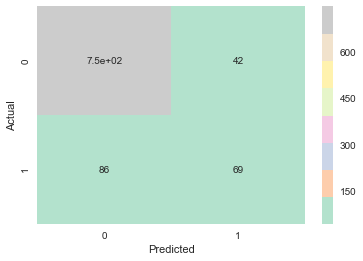

In [134]:
cm= metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [135]:
act_churn= cm[1,0] + cm[1,1]
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

Of the 155 who actual churned the model predicted 45% of those true churns.


## Random Forest Out of Box

In [136]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
result= model.fit(x_train, y_train)
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

0.9481481481481482


In [137]:
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[771,  19],
       [ 30, 125]])

Text(34.0, 0.5, 'Actual')

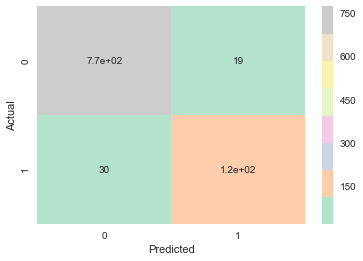

In [138]:
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [139]:
act_churn= cm[1,0] + cm[1,1]
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

Of the 155 who actual churned the model predicted 81% of those true churns.


### Utilizing SMOTE: Synthetic Minority Over-sampling Technique

#### Creating a 1:1 ratio between Non churn and churn

We will resample the training data such that the target class is balanced. Then we will retry some of our algorithms

In [140]:
#Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# assign smote variable
sm = SMOTE(random_state=12)
# apply smote to our x_train and y_train 
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)
# Check to see what the class balance looks like now 
print (np.unique(y_train, return_counts=True) , np.bincount(y_train_smote))

(array([0, 1]), array([1865,  340])) [1865 1865]


## Random Forest Out of Box with SMOTE

0.9439153439153439
[[748  42]
 [ 11 144]]




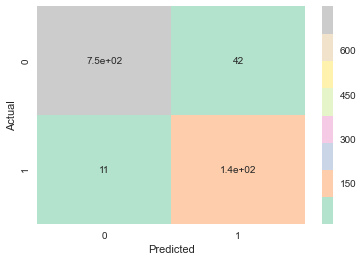

Of the 155 who actual churned the model predicted 93% of those true churns.


In [141]:
from sklearn.ensemble import RandomForestClassifier
# establish model
model= RandomForestClassifier()
# fit model
result= model.fit(x_train_smote, y_train_smote)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

## Logistic Regression Out of Box with SMOTE

0.7534391534391535
[[585 205]
 [ 28 127]]




/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


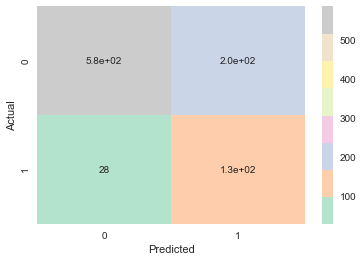

Of the 155 who actual churned predicted 82% of those true churns.


In [142]:
# establish model
model= LogisticRegression()
# fit model
result= model.fit(x_train_smote, y_train_smote)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

## Random Forest w/ Tuned Hyperparameters

In [143]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# STOP

## This next cell is too much for laptop to handle

In [144]:
from sklearn.model_selection import RandomizedSearchCV
'''# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_smote, y_train_smote)

rf_random.best_params_'''

'# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(x_train_smote, y_train_smote)\n\nrf_random.best_params_'

0.9470899470899471
[[749  41]
 [  9 146]]




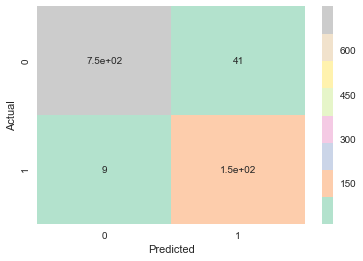

Of the 155 who actual churned the model predicted 94% of those true churns.


In [145]:
from sklearn.ensemble import RandomForestClassifier
# establish model
model= RandomForestClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 100, bootstrap=False)
# fit model
result= model.fit(x_train_smote, y_train_smote)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

### Notes

#### Optimizing our hyperparameters for Random Forest didn't get us much improvement in accuracy. It appears time would be better spent working on dealing with the class imbalance before actually fitting a model. 

## Gradient Boosting Classifier with SMOTE

0.9026455026455027
[[707  83]
 [  9 146]]




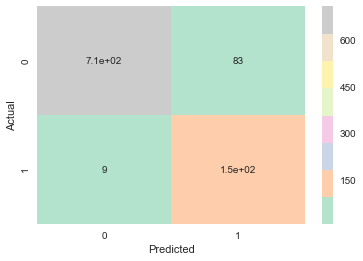

Of the 155 who actual churned the model predicted 94% of those true churns.


In [146]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
# fit model
result= model.fit(x_train_smote, y_train_smote)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

## Ada Boost Classifier with SMOTE

0.8497354497354498
[[658 132]
 [ 10 145]]




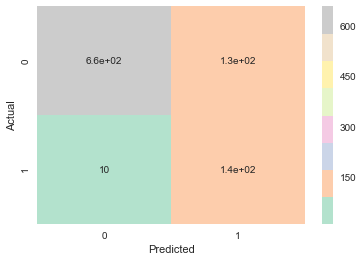

Of the 155 who actual churned the model predicted 94% of those true churns.


In [147]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
# fit model
result= model.fit(x_train_smote, y_train_smote)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

0.4666666666666667
[[301 489]
 [ 15 140]]




/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


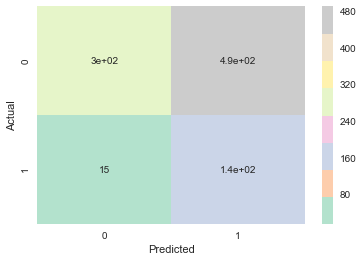

Of the 155 who actual churned the model predicted 90% of those true churns.


In [148]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
model= LinearSVC()
# fit model
result= model.fit(x_train_smote, y_train_smote)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))


### Using SMOTE to Create a 2:1 Ratio of No Churn to Churn

In [149]:
from imblearn.under_sampling import RandomUnderSampler
smote_2_1= SMOTE(sampling_strategy=0.5)
x_train_smote_2_1, y_train_smote_2_1= smote_2_1.fit_sample(x_train, y_train)

# Check to see what the class balance looks like now 
print (np.unique(y_train, return_counts=True) , np.bincount(y_train_smote_under))

(array([0, 1]), array([1865,  340])) [1856  928]


0.946031746031746
[[756  34]
 [ 17 138]]




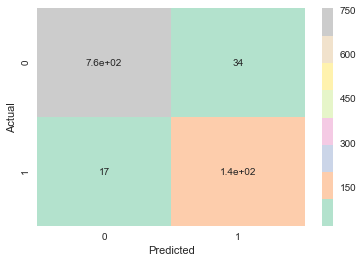

Of the 155 who actual churned the model predicted 89% of those true churns.


In [150]:

# establish model
model= RandomForestClassifier()
# fit model
result= model.fit(x_train_smote_2_1, y_train_smote_2_1)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

### Notes

It looks like SMOTE is helping our accuracy a lot. However, it is unclear which ratio amongst classes is best. Let's loop though a few different options and run a RandomizedCV on the outcome to see what we get. 

Model Performance with 0.25 as smote sampling strategy
0.944973544973545
[[768  22]
 [ 30 125]]




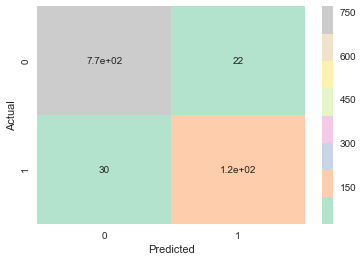

Of the 155 who actual churned the model predicted 81% of those true churns.


Model Performance with 0.5 as smote sampling strategy
0.9523809523809523
[[763  27]
 [ 18 137]]




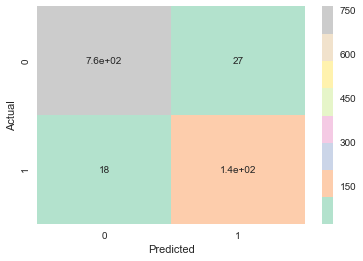

Of the 155 who actual churned the model predicted 88% of those true churns.


Model Performance with 0.75 as smote sampling strategy
0.9428571428571428
[[749  41]
 [ 13 142]]




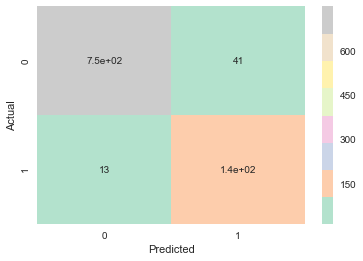

Of the 155 who actual churned the model predicted 92% of those true churns.


Model Performance with auto as smote sampling strategy
0.944973544973545
[[748  42]
 [ 10 145]]




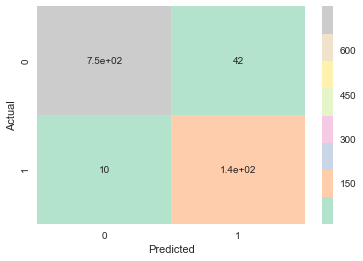

Of the 155 who actual churned the model predicted 94% of those true churns.




In [151]:
ratios= [0.25, 0.5, 0.75, 'auto']
for i in ratios:
    sm= SMOTE(sampling_strategy=i)
    x_train_smote, y_train_smote= sm.fit_sample(x_train, y_train)
    # establish model
    model= RandomForestClassifier()
    # fit model
    result= model.fit(x_train_smote, y_train_smote)
    # make predictions
    y_pred= model.predict(x_test)
    
    print('Model Performance with {} as smote sampling strategy'.format(i))
    # print the accuracy score
    print(metrics.accuracy_score(y_test, y_pred))

    # print confusion matrix
    cm= metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    print('\n')

    # make confusion matrix more legable
    sns.heatmap(cm, annot=True, cmap= 'Pastel2')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # total real churn
    act_churn= cm[1,0] + cm[1,1]
    # number of true churn that was accurately predicted
    pred_churn= cm[1,1]
    print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))
    print('\n')
    

### Notes

It looks like Auto, which results in a 1:1 ratio, is giving us the best results

## Testing out ADASYN for Over Sampling of the Minorty Class

(array([0, 1]), array([1865,  340])) [1856  928]


0.9407407407407408
[[746  44]
 [ 12 143]]




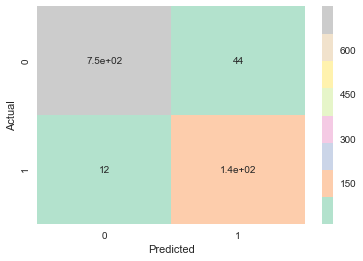

Of the 155 who actual churned the model predicted 92% of those true churns.


In [152]:
from imblearn.over_sampling import ADASYN
ad= ADASYN()

x_train_ad, y_train_ad= ad.fit_sample(x_train, y_train)

# Check to see what the class balance looks like now 
print (np.unique(y_train, return_counts=True) , np.bincount(y_train_smote_under))
print('\n')

# establish model
model= RandomForestClassifier()
# fit model
result= model.fit(x_train_ad, y_train_ad)
# make predictions
y_pred= model.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))


### It looks like we are getting roughly equivalent results with SMOTE and ADASYN 

## What if we do some further feature engineering? 

### Does clustering our continous variables before modeling improve performance? 

In [153]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0


In [154]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'Churn'],
      dtype='object')

Elbow Method for Call  Failure


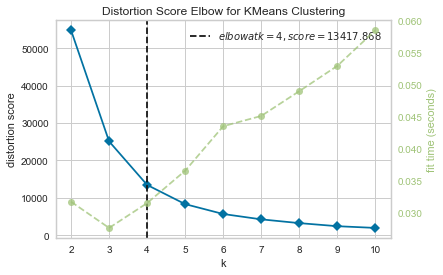



Elbow Method for Subscription  Length


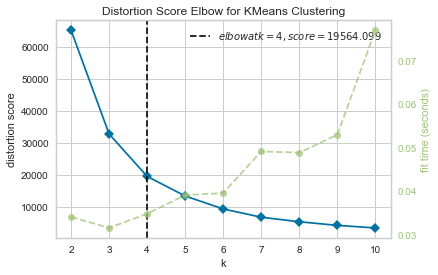



Elbow Method for Seconds of Use


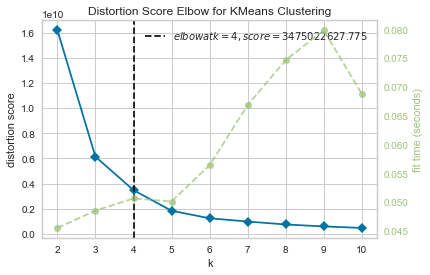



Elbow Method for Frequency of use


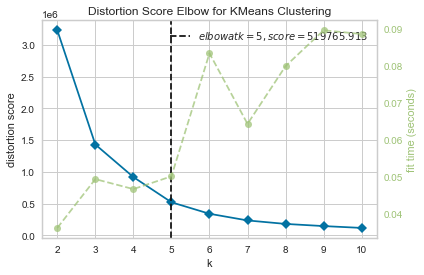



Elbow Method for Frequency of SMS


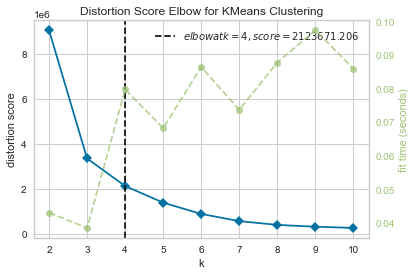



Elbow Method for Distinct Called Numbers


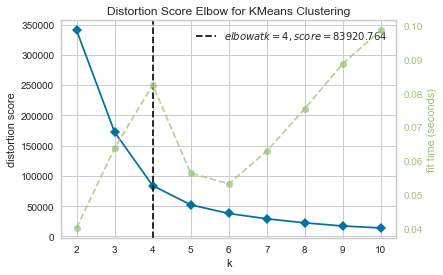



Elbow Method for Customer Value


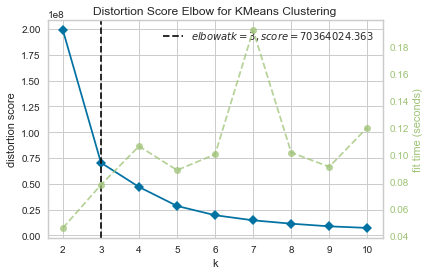

In [155]:
# We could try using KNN to group categorical variables
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Establish list of continuous variables
cont_vars= ['Call  Failure','Subscription  Length',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers',
       'Customer Value']

# Loop through continous variables and create and elbow chart for each
for x in cont_vars:
    var= df[x].values.reshape((-1,1))
    model = KElbowVisualizer(KMeans(), k=10)
    model.fit(var)
    print('Elbow Method for {}'.format(x))
    model.show()
    print('\n')


In [156]:
# Best Ks are Call fail: 4, Subscription Length: 4, Seconds of Use: 4, Frequency of Use: 5, Frequency of SMS: 4, 
# Distinct called numbers: 4, Customer Lifetime Value: 3
#create a copy of the dataset to hold the clustered continous variables
df_clustered= df.copy()
# list of the best Ks
best_k=[4,4,4,5,4,4,3]
#match the best Ks with their appropriate column name
combo_list= list(zip(cont_vars, best_k))

# Loop through the combined list 
for x, y in combo_list:
    # establish the var to be clustered
    var=df[x].values.reshape((-1,1))
    # fit the model using the appropriate number of clusters
    model= KMeans(n_clusters=y)
    model.fit(var)
    labels= model.labels_
    # assign the labels to the df_cluster in place of the continous values
    df_clustered[x]= labels

# check to make sure the number of unique values in the df_clustered matchs up with the best ks
check=[]
for x in cont_vars:
    num= df_clustered[x].nunique()
    check.append(num)

print(best_k)
print(check)
    


[4, 4, 4, 5, 4, 4, 3]
[4, 4, 4, 5, 4, 4, 3]


0.8835978835978836
[[695  97]
 [ 13 140]]




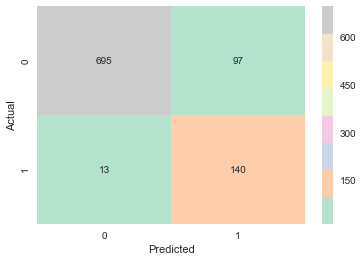

Of the 153 who actual churned the model predicted 92% of those true churns.


In [157]:
# X will be all attributes except churn
X= df_clustered.drop(columns= 'Churn')
# y will be churn values
y= df_clustered['Churn'].values

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

# use Smote to balance the classes of the training data
# with default parameters (which I found to be best for this case) we will sysnthesis enough of the churn examples
# such that our non churn to churn ratio is 1:1
# establish the SMOTE variable
sm= SMOTE()
# transform the training data using SMOTE variable
x_train_smote, y_train_smote= sm.fit_sample(x_train, y_train)
# Establish the model
rf= RandomForestClassifier()
# fit the. model on the smoted data
rf_result= rf.fit(x_train_smote, y_train_smote)

# Evaluate the model
y_pred= rf.predict(x_test)
# print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn, round(pred_churn/act_churn*100)))

### Notes

Clustering the categorical variables did not help our performance at all. In fact, it hurt performance. 

## Final Model for Churn Prediction

## Random Forest in Conjunction with SMOTE

Accuracy: 0.95
[[740  38]
 [  9 158]]




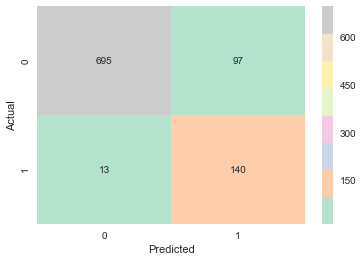

Of the 153 who actual churned the model predicted 92% of those true churns.


In [159]:
# X will be all attributes except churn
X= df.drop(columns= 'Churn')
# y will be churn values
y= df['Churn'].values

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

# use Smote to balance the classes of the training data
# with default parameters (which I found to be best for this case) we will sysnthesis enough of the churn examples
# such that our non churn to churn ratio is 1:1
# establish the SMOTE variable
sm= SMOTE()
# transform the training data using SMOTE variable
x_train_smote, y_train_smote= sm.fit_sample(x_train, y_train)
# Establish the model
rf= RandomForestClassifier()
# fit the. model on the smoted data
rf_result= rf.fit(x_train_smote, y_train_smote)

# Evaluate the model
y_pred_fin= rf.predict(x_test)

score_fin= metrics.accuracy_score(y_test, y_pred_fin)
# print the accuracy score
print('Accuracy: {}'.format(round(score_fin, 2)))

# print confusion matrix
cm_fin= metrics.confusion_matrix(y_test, y_pred_fin)
print(cm_fin)
print('\n')

# make confusion matrix more legable
sns.heatmap(cm, annot=True, cmap= 'Pastel2', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# total real churn
act_churn_fin= cm[1,0] + cm[1,1]
# number of true churn that was accurately predicted
pred_churn_fin= cm[1,1]
print('Of the {} who actual churned the model predicted {}% of those true churns.'.format(act_churn_fin, round(pred_churn_fin/act_churn_fin*100)))

Text(0, 0.5, 'Feature')

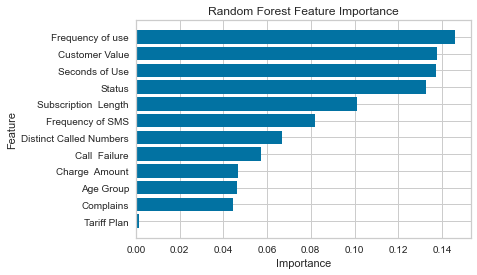

In [172]:
# Visualizing Feature Importance from the Random Forest
# create empty df
impt_df= pd.DataFrame()
# create list of feature importances
importances= rf_result.feature_importances_
#create list to hold the feature names
features= list(x_train.columns)

# Add features and their importance to the dataframe
impt_df['Feature']= features
impt_df['Importance']= importances

# Plot the sorted feature importances
impt_df= impt_df.sort_values(by='Importance')
plt.barh(y=impt_df.Feature, width=impt_df.Importance)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')


In [219]:
# Predict the probabilities from model and covert to a list 
proba= rf_result.predict_proba(x_test)
proba_list=proba.tolist()

# The probability of churn is the second value in each nested loop so we want to loop through and pull that
# value out into it's own list
churn_prob=[]
for item in proba_list:
    churn_prob.append(item[1])

# create a df that is copy of x_test
df_prob= x_test.copy()

# add our churn prediction and the subsequent probability of churn to the df
df_prob['Churn Prediction']= y_pred_fin
df_prob['Churn Probability']= churn_prob

df_prob.tail(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn Prediction,Churn Probability
1828,0,0,29,0,0,0,0,0,2,1,2,0.000,1,0.989231
1107,11,0,37,2,8870,118,142,43,3,1,1,927.520,0,0.000000
1694,0,0,15,0,1275,14,0,8,2,1,1,58.005,1,0.590000
2553,19,0,40,3,5103,82,29,52,1,1,1,444.675,0,0.050000
2503,13,0,37,1,4323,64,7,32,1,1,1,279.785,0,0.020000
2169,11,0,41,2,7873,136,396,47,3,1,1,1904.360,0,0.000000
1678,0,0,33,0,0,0,0,0,2,1,2,0.000,1,0.876744
2756,11,0,40,1,2855,46,301,23,3,1,1,1320.040,0,0.010000
395,18,0,20,1,6573,149,96,47,2,2,1,734.490,0,0.000000
2560,15,0,40,3,6823,111,35,29,3,1,1,417.360,0,0.020000


In [227]:
# Ideally we want to intervene when we have high value customers who are at risk of churns
# Here we will pull out just those cutomers
# Etablish a reference point for above average value customers
median_value= df_prob['Customer Value'].median()
# Establish a point for what it means to be at high risk of churning
high_prob= 0.65

# Create a df of just those who are of above avergae value and are at high risk of churning
high_risk_df= df_prob[(df_prob['Customer Value'] >= median_value) & (df_prob['Churn Probability'] > high_prob)].sort_values(by='Customer Value', ascending=False)
high_risk_df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn Prediction,Churn Probability
688,6,1,27,1,1505,37,202,14,2,2,1,978.390,1,0.85
838,6,1,32,2,1315,42,201,12,3,2,1,858.280,1,0.73
1024,13,1,36,1,5818,98,26,24,2,1,1,383.220,1,0.98
974,13,0,36,1,5818,98,26,24,2,1,1,383.220,1,0.97
2324,17,0,34,1,6043,102,23,22,2,1,1,380.025,1,0.69
2524,16,0,35,2,5943,96,22,21,2,1,1,370.755,1,0.81
124,10,0,34,0,5758,95,21,22,2,1,1,357.885,1,0.96
2424,13,0,32,1,5863,94,18,20,2,1,1,349.065,1,0.97
774,11,0,31,0,5818,92,18,23,2,1,1,346.950,1,0.88
2074,8,0,34,0,5513,92,19,22,2,1,1,337.725,1,1.00


## Factors Contributing to Churn

In [236]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
summary= result.summary2()
print(summary)


Optimization terminated successfully.
         Current function value: 0.221433
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.491      
Dependent Variable:    y                 AIC:               1419.0282  
Date:                  2020-08-28 16:20  BIC:               1491.6901  
No. Observations:      3150              Log-Likelihood:    -697.51    
Df Model:              11                LL-Null:           -1369.9    
Df Residuals:          3138              LLR p-value:       9.4980e-282
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Call  Failure            0.1276   0.0176  7.2562 0.0000  0.0932

In [241]:
np.exp(result.params)

Call  Failure               1.136135
Complains                  64.892254
Subscription  Length        0.966788
Charge  Amount              0.687326
Seconds of Use              1.000136
Frequency of use            0.949124
Frequency of SMS            0.964038
Distinct Called Numbers     0.985489
Age Group                   0.988573
Tariff Plan                 0.202877
Status                      3.451860
Customer Value              1.006282
dtype: float64